<a href="https://colab.research.google.com/github/ramzesssina/NLPrespos/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
!pip install nltk pymorphy3

In [71]:
import pandas as pd
import pymorphy3
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split
import math
from collections import Counter
from nltk.stem import SnowballStemmer
import numpy as np
from string import punctuation
from math import log
from sklearn.metrics import adjusted_rand_score, v_measure_score

In [72]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [73]:
df = pd.read_csv('/content/amazon.csv')

In [74]:
df = df.iloc[:1001]

In [75]:
df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
996,What seems like another boring old gemswap gam...,1
997,"Totally love it! Very challenging, awesome gr...",1
998,I am a fan of this game. Challenges you to thi...,1
999,If you are the type of person who likes to rac...,1


In [76]:
nltk.download('stopwords')

russian_stopwords = stopwords.words("english")
morph = pymorphy3.MorphAnalyzer()
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
lemmatizer = WordNetLemmatizer()
stop_words_en_set = set(stopwords.words("english"))

In [78]:
def change_text(texts):
    words = texts.lower().split()
    lemmatized = []

    stop_free = []
    for word in words:
      if word not in russian_stopwords:
        stop_free.append(word)

    punc_free = ""
    for char in " ".join(stop_free):
      if char not in punctuation:
        punc_free += char

    for word in punc_free.split():
        lemma = morph.parse(word)[0].normal_form
        lemmatized.append(lemma)

    return " ".join(lemmatized)

In [79]:
change_text_text = [change_text(text) for text in df['reviewText']]
print(change_text_text)

# Изменили текст применив лемматизацию

['one best apps acording bunch people agree bombs eggs pigs tnt king pigs realustic stuff', 'pretty good version game free lots different levels play kids enjoy lot too', 'really cool game bunch levels find golden eggs super fun', 'silly game frustrating lots fun definitely recommend fun time', 'terrific game pad hrs fun grandkids love it great entertainment waiting long lines', 'entertaining game smart play it guess thats like itits easy fun thats games suppose be warned game highly addictive', 'awesome need wi ti play trust me really fun addicting like 100 levels even free waste money expensive one mean seriously get app', 'awesome bet one even reads reviews know game good need', 'basicly free version ads thats actually awesome addicting free time really reccomend it', 'far best free app available anywhere helped pass time nothing else would do pass one up ps hate 20 word minimum', 'definitely great game get 6yearold grandnephew teach tricks figured them configurations tough beat par

In [80]:
df['change_text'] = df['reviewText'].apply(change_text)
df

,reviewText,Positive,change_text
0,This is a one of the best apps acording to a b...,1,one best apps acording bunch people agree bomb...
1,This is a pretty good version of the game for ...,1,pretty good version game free lots different l...
2,this is a really cool game. there are a bunch ...,1,really cool game bunch levels find golden eggs...
3,"This is a silly game and can be frustrating, b...",1,silly game frustrating lots fun definitely rec...
4,This is a terrific game on any pad. Hrs of fun...,1,terrific game pad hrs fun grandkids love it gr...
...,...,...,...
996,What seems like another boring old gemswap gam...,1,seems like another boring old gemswap game def...
997,"Totally love it! Very challenging, awesome gr...",1,totally love it challenging awesome graphics m...
998,I am a fan of this game. Challenges you to thi...,1,fan game challenges think ahead loads fun good...
999,If you are the type of person who likes to rac...,1,type person likes race clock game you wonderfu...


In [81]:
def tokin(text):
    clear_sub = re.sub(r"[^a-zA-Z\s']", "", text)
    words = clear_sub.split()
    return words

In [82]:
Tokin_for_lemma = [tokin(text) for text in change_text_text]
print(Tokin_for_lemma)

#Применил Токенизацию

[['one', 'best', 'apps', 'acording', 'bunch', 'people', 'agree', 'bombs', 'eggs', 'pigs', 'tnt', 'king', 'pigs', 'realustic', 'stuff'], ['pretty', 'good', 'version', 'game', 'free', 'lots', 'different', 'levels', 'play', 'kids', 'enjoy', 'lot', 'too'], ['really', 'cool', 'game', 'bunch', 'levels', 'find', 'golden', 'eggs', 'super', 'fun'], ['silly', 'game', 'frustrating', 'lots', 'fun', 'definitely', 'recommend', 'fun', 'time'], ['terrific', 'game', 'pad', 'hrs', 'fun', 'grandkids', 'love', 'it', 'great', 'entertainment', 'waiting', 'long', 'lines'], ['entertaining', 'game', 'smart', 'play', 'it', 'guess', 'thats', 'like', 'itits', 'easy', 'fun', 'thats', 'games', 'suppose', 'be', 'warned', 'game', 'highly', 'addictive'], ['awesome', 'need', 'wi', 'ti', 'play', 'trust', 'me', 'really', 'fun', 'addicting', 'like', 'levels', 'even', 'free', 'waste', 'money', 'expensive', 'one', 'mean', 'seriously', 'get', 'app'], ['awesome', 'bet', 'one', 'even', 'reads', 'reviews', 'know', 'game', 'good

In [83]:
unique_words = []
for sublist in Tokin_for_lemma:
  for text in sublist:
    if text not in unique_words:
      unique_words.append(text)
unique_words = sorted(unique_words)
print(unique_words)

['a', 'aas', 'ab', 'abilities', 'ability', 'able', 'about', 'aboutits', 'abruptly', 'absolute', 'absolutely', 'abuilities', 'access', 'accidently', 'accomplish', 'accomplished', 'accounting', 'acer', 'achieve', 'achievement', 'acording', 'across', 'action', 'actions', 'active', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'addic', 'addicitive', 'addict', 'addicted', 'addicting', 'addictingso', 'addiction', 'addictiv', 'addictive', 'addictivestill', 'addictivewould', 'addiictive', 'adding', 'addition', 'additional', 'adds', 'addstheres', 'adfree', 'adicting', 'adjusting', 'admit', 'adorable', 'adore', 'ads', 'adsit', 'adults', 'advance', 'advantage', 'adventure', 'adventures', 'advertisement', 'advertisements', 'advertisementss', 'advertising', 'advice', 'advicedont', 'afaotd', 'affect', 'affection', 'affects', 'afficionado', 'afraid', 'afternoon', 'again', 'againamazon', 'againgreat', 'againit', 'age', 'ages', 'ageseven', 'aggressive', 'agin', 'ago', 'agree', 'ahead', 'ahold

In [84]:
def bag_of_words(Tokin_for_lemma, unique_words):
    matrix = []
    for sublist in Tokin_for_lemma:
        vector = [sublist.count(word) for word in unique_words]
        matrix.append(vector)
    return np.array(matrix)

bow_matrix = bag_of_words(Tokin_for_lemma, unique_words)
print(unique_words)
bow_matrix

# Bag Of Words

['a', 'aas', 'ab', 'abilities', 'ability', 'able', 'about', 'aboutits', 'abruptly', 'absolute', 'absolutely', 'abuilities', 'access', 'accidently', 'accomplish', 'accomplished', 'accounting', 'acer', 'achieve', 'achievement', 'acording', 'across', 'action', 'actions', 'active', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'addic', 'addicitive', 'addict', 'addicted', 'addicting', 'addictingso', 'addiction', 'addictiv', 'addictive', 'addictivestill', 'addictivewould', 'addiictive', 'adding', 'addition', 'additional', 'adds', 'addstheres', 'adfree', 'adicting', 'adjusting', 'admit', 'adorable', 'adore', 'ads', 'adsit', 'adults', 'advance', 'advantage', 'adventure', 'adventures', 'advertisement', 'advertisements', 'advertisementss', 'advertising', 'advice', 'advicedont', 'afaotd', 'affect', 'affection', 'affects', 'afficionado', 'afraid', 'afternoon', 'again', 'againamazon', 'againgreat', 'againit', 'age', 'ages', 'ageseven', 'aggressive', 'agin', 'ago', 'agree', 'ahead', 'ahold

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
def manual_tfidf(bow_matrix):
    tf = bow_matrix / bow_matrix.sum(axis=1, keepdims=True)

    idf = np.array([log(len(bow_matrix) / (1 + np.count_nonzero(bow_matrix[:, i]))) for i in range(bow_matrix.shape[1])])

    tfidf = tf * idf
    return tfidf

tfidf_matrix = manual_tfidf(bow_matrix)
print(unique_words)
print("Матрица TF-IDF:")
print(tfidf_matrix)

#TF-IDF

['a', 'aas', 'ab', 'abilities', 'ability', 'able', 'about', 'aboutits', 'abruptly', 'absolute', 'absolutely', 'abuilities', 'access', 'accidently', 'accomplish', 'accomplished', 'accounting', 'acer', 'achieve', 'achievement', 'acording', 'across', 'action', 'actions', 'active', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'addic', 'addicitive', 'addict', 'addicted', 'addicting', 'addictingso', 'addiction', 'addictiv', 'addictive', 'addictivestill', 'addictivewould', 'addiictive', 'adding', 'addition', 'additional', 'adds', 'addstheres', 'adfree', 'adicting', 'adjusting', 'admit', 'adorable', 'adore', 'ads', 'adsit', 'adults', 'advance', 'advantage', 'adventure', 'adventures', 'advertisement', 'advertisements', 'advertisementss', 'advertising', 'advice', 'advicedont', 'afaotd', 'affect', 'affection', 'affects', 'afficionado', 'afraid', 'afternoon', 'again', 'againamazon', 'againgreat', 'againit', 'age', 'ages', 'ageseven', 'aggressive', 'agin', 'ago', 'agree', 'ahead', 'ahold

In [86]:
n_clusters = df['Positive'].nunique()
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

In [87]:
true_labels = df['Positive'].values
ari = adjusted_rand_score(true_labels, clusters)
v_measure = v_measure_score(true_labels, clusters)
print(f"Качество кластеризации:\nARI: {ari:.2f}\nV-measure: {v_measure:.2f}")

Качество кластеризации:
ARI: -0.00
V-measure: 0.00


In [88]:
all_words = [word for sublist in Tokin_for_lemma for word in sublist]
word_counts = pd.Series(all_words).value_counts()

print(word_counts)
#Количество встречающихся слов

game          747
fun           358
birds         355
angry         307
play          290
             ... 
powers          1
interface       1
conquering      1
asus            1
terrific        1
Name: count, Length: 2735, dtype: int64


In [89]:
word_series = pd.Series(all_words)
top_words = word_series.value_counts().head(30)

<ipython-input-90-3ecccc261cef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette='husl')


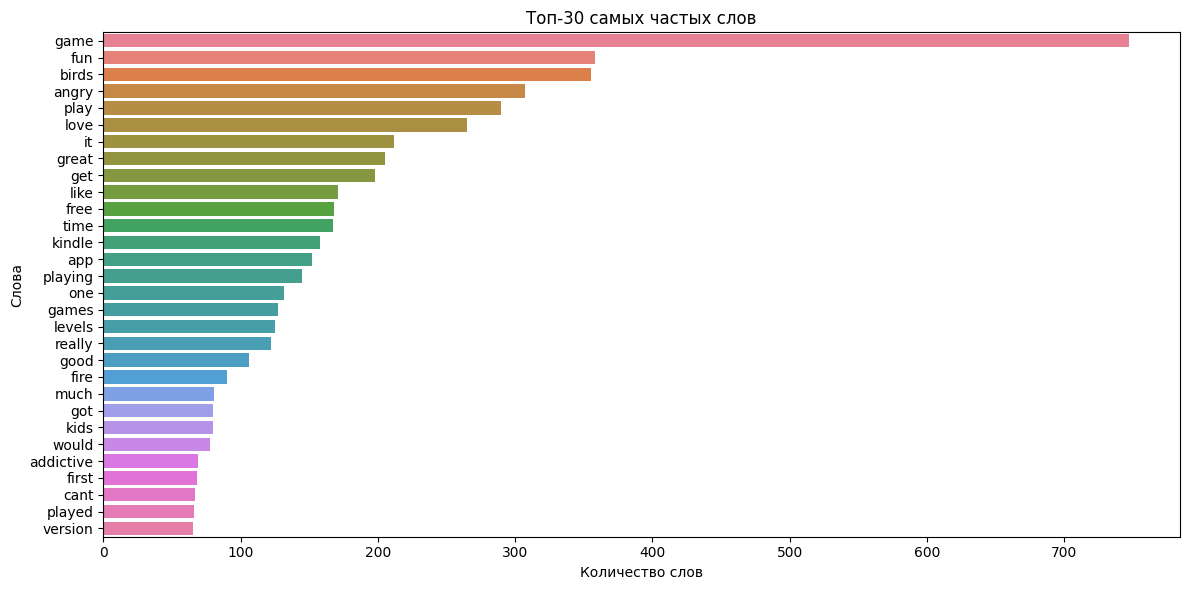

In [90]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette='husl')
plt.title('Топ-30 самых частых слов')
plt.xlabel('Количество слов')
plt.ylabel('Слова')
plt.tight_layout()
plt.show()

In [91]:
X = df['change_text']
y = df['Positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

print("Размеры выборок:")
print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")

Размеры выборок:
Train: 600, Val: 200, Test: 201


In [92]:
count = df['Positive'].value_counts()

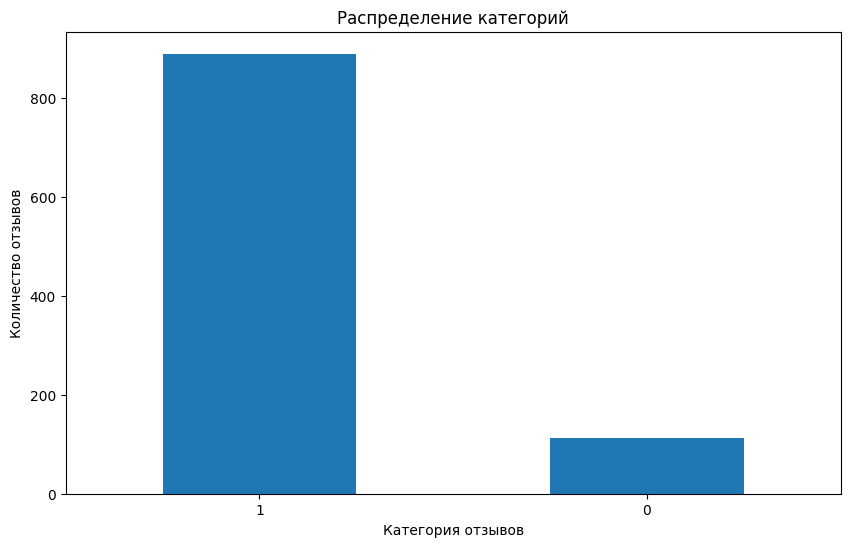

In [93]:
plt.figure(figsize=(10, 6))
df['Positive'].value_counts().plot(kind='bar')
plt.title('Распределение категорий')
plt.xlabel('Категория отзывов')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=0)
plt.show()